In [61]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

x = data['data']
y = data['target']


In [62]:
print(x.shape, y.shape)

(569, 30) (569,)


In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x = sc.fit_transform(x)

In [64]:
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.lenght = self.x.shape[0]

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]
    
    def __len__(self):
        return self.lenght
    


In [65]:
trainset = dataset(x,y)
trainloader = DataLoader(trainset, batch_size=64, shuffle=False )

In [66]:
from torch import nn
from torch.nn import functional as F


class Net(nn.Module):
    def __init__(self,input_shape):
        super(Net, self).__init__()
        self.fc1 =nn.Linear(input_shape, 32)
        self.fc2 =nn.Linear(32, 64)
        self.fc3 =nn.Linear(64, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x




In [67]:
learning_rate = 0.01
epochs = 1000
model = Net(x.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
loss_fn  = nn.BCELoss()


In [68]:
losses = []
accuracy = []

for i in range(epochs):
    for j,(x_train, y_train) in enumerate(trainloader):
        out = model(x_train)
        loss = loss_fn(out, y_train.reshape(-1,1))

        predicted = model(torch.tensor(x, dtype=torch.float32))
        acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if i%50 == 0:
        losses.append(loss.item())
        accuracy.append(acc)
        print('epoch{}\tloss :{}\t accuracy : {}'.format(i,loss, acc))

epoch0	loss :0.6741474866867065	 accuracy : 0.6239015817223199
epoch50	loss :0.1982411891222	 accuracy : 0.945518453427065
epoch100	loss :0.08939595520496368	 accuracy : 0.9736379613356766
epoch150	loss :0.06931105256080627	 accuracy : 0.984182776801406
epoch200	loss :0.060168974101543427	 accuracy : 0.9859402460456942
epoch250	loss :0.05394225940108299	 accuracy : 0.9859402460456942
epoch300	loss :0.04960276186466217	 accuracy : 0.9859402460456942
epoch350	loss :0.04655057191848755	 accuracy : 0.9876977152899824
epoch400	loss :0.04393649473786354	 accuracy : 0.9894551845342706
epoch450	loss :0.04094856604933739	 accuracy : 0.9912126537785588
epoch500	loss :0.0375710129737854	 accuracy : 0.9929701230228472
epoch550	loss :0.034998487681150436	 accuracy : 0.9929701230228472
epoch600	loss :0.03277940675616264	 accuracy : 0.9929701230228472
epoch650	loss :0.030845636501908302	 accuracy : 0.9929701230228472
epoch700	loss :0.029028652235865593	 accuracy : 0.9929701230228472
epoch750	loss :0.

Text(0, 0.5, 'loss')

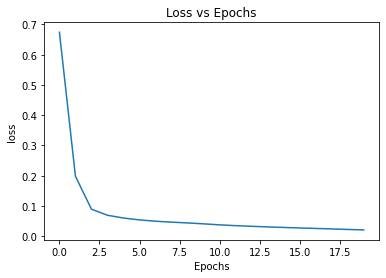

In [69]:
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

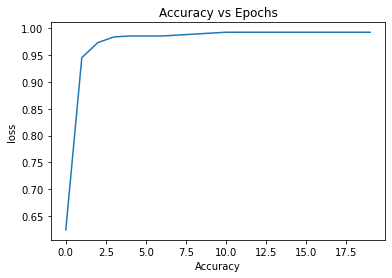

In [70]:
plt.plot(accuracy)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')